<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/182_1_%ED%99%95%EC%9E%A5_%EC%97%B0%EC%8A%B5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 9.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=82cf56d49c6839761c1520711fc30f5b626b2be50cd15c2f2a737afa2a8ca56c
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance

## **Part 1. 데이터 준비**

- 데이터셋을 불러오세요.
  - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
- 타겟과 특성을 지정해 주세요. 
  - 타겟은 `Attrition`입니다.  
- 훈련/평가 데이터셋을 분리하세요.
  - 훈련/평가 데이터의 비율은 8:2로 합니다.
  - `random_state=42`로 설정합니다. 


In [ ]:
# 데이터셋 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No     1233
Yes     237
Name: Attrition, dtype: int64


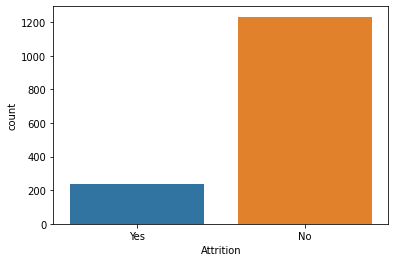

In [ ]:
# 타겟 타입을 살펴보면 분류로 접근해야할 것 같습니다.
# 타겟의 분포를 확인합니다. -> 분류의 Baseline은 최다 빈도수를 기준으로 진행합니다. 
df['Attrition'].value_counts()

# 시각화 진행 - 필요한 라이브러리를 가져옵니다.
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Attrition'].value_counts())

# 바로 시각화 진행
%matplotlib inline
sns.countplot(x=df['Attrition'])

In [ ]:
# 타겟 값을 변경합니다. No = 0, Yes = 1
df['Attrition'] = df['Attrition'].replace({'No':0, 'Yes':1})

# 타겟의 최다 빈도수를 선택합니다.
major = df['Attrition'].mode()[0]
major

# 타겟의 샘플 수만큼 '0'값이 담긴 리스트를 생성합니다. => 기준모델로 예측을 진행합니다. 
y_pred = [major] * len(df['Attrition'])

# 필요한 라이브러리를 생성합니다. 
from sklearn.metrics import accuracy_score

# 베이스라인의 정확도
print('baseline accuracy:', accuracy_score(df['Attrition'], y_pred))

baseline accuracy: 0.8387755102040816


#### 데이터를 분리합니다.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size =0.8, test_size=0.2, stratify = df['Attrition'], random_state = 42)

train.shape, test.shape

# 타겟 지정.
target = 'Attrition'

# 훈련데이터 : 타겟 및 피처 지정
y_train = train[target]
X_train = train.drop(target, axis=1)

# 테스트데이터 : 타겟 및 피처 지정
y_test = test[target]
X_test = test.drop(target, axis=1) 



In [ ]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## **Part 2. 모델 학습**

- 타겟 Label을 `No=0`, `Yes=1`로 변환하세요.
  - 훈련/평가 데이터 모두 변환합니다. 
- 훈련 데이터셋에 대하여 기준모델의 AUC score를 확인하세요.
  - 기준모델은 최빈값으로 만듭니다.
- `OrdinalEncoder()`를 사용하여 특성을 인코딩하세요. 
- `RandomForestClassifier()`를 사용하여 랜덤포레스트 모델을 학습하세요. 
  - `random_state=42`로 설정합니다. 
  - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.

In [ ]:
# 파이프라인을 생성하는 함수를 생성하여 봅시다.
# 파이프라인을 생성하기 위해 필요한 라이브러리를 가져옵니다. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

# 조건에 충족하는 파이프라인 함수를 생성합니다.
def get_pipeline():
  return make_pipeline(
      OrdinalEncoder(),
      RandomForestClassifier(
          max_depth =3, n_jobs = -1, random_state =42, class_weight = 'balanced')
  )

# 파이프라인 생성
pipe = get_pipeline()

# 파이프라인 fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['BusinessTravel', 'Department',
                                      'EducationField', 'Gender', 'JobRole',
                                      'MaritalStatus', 'Over18', 'OverTime'],
                                mapping=[{'col': 'BusinessTravel',
                                          'data_type': dtype('O'),
                                          'mapping': Travel_Rarely        1
Travel_Frequently    2
Non-Travel           3
NaN                 -2
dtype: int64},
                                         {'col': 'Department',
                                          'data_type': dtype('O'),
                                          'mapping': Sales                     1
Resear...
                                         {'col': 'MaritalStatus',
                                          'data_type': dtype('O'),
                                          'mapping': Divorced    1
Married     2
Single     

#### 성능 평가를 진행합니다.

In [ ]:
# 필요한 라이브러리를 가져옵시다.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# 베이스라인 값 정의.
base_target = df[target]
base_features = df.drop(target, axis = 1)

#### 1. classification_report
* 1을 예측할 확률이 현저히 적습니다.
  * 타겟의 분포에 0의 값이 상당수를 차지하여 이런 결과가 나온 것 같습니다. 

In [ ]:
# 1. classification_report를 작성하여 봅시다. 
print(classification_report(base_target, pipe.predict(base_features)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1233
           1       0.46      0.66      0.55       237

    accuracy                           0.82      1470
   macro avg       0.70      0.76      0.72      1470
weighted avg       0.85      0.82      0.83      1470



#### 2. 훈련데이터셋에 대하여 기준모델의 AUC score를 확인하기.

2-1. 기준모델 AUC SCORE

In [ ]:
# 훈련 데이터셋의 예측값을 생성합니다.
# 0일 확률을 불러옵니다. (최다 빈도 값.)
baseline_proba = pipe.predict_proba(base_features)[:,0]


# 이후 훈련 값 
# 기준모델 값은 위에서 정해놓은 y_pred를 사용합니다.
print(f'Auc : {roc_auc_score(base_target, baseline_proba)}')

Auc : 0.16183299625968017


2-2. 기준모델 Roc Curve & Confusion matrix 시각화 

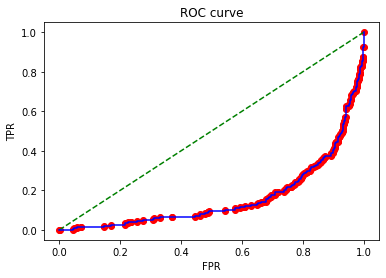

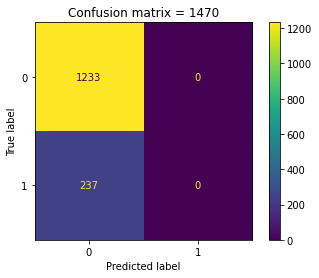

In [ ]:
# Roc Curve를 먼저 생성합니다. 

baseline_fpr, baseline_tpr , _ = roc_curve(base_target, y_pred)
fpr, tpr, thresholds = roc_curve(base_target, baseline_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle ='--', color = 'green', label = 'Baseline')
plt.plot(fpr, tpr, color ='blue', label='Model')
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# ConfusionMatrix 생성.
cm = confusion_matrix(base_target, y_pred, labels= pipe.named_steps['randomforestclassifier'].classes_)

# CM 시각화
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = pipe.named_steps['randomforestclassifier'].classes_)

disp.plot()
plt.title(f'Confusion matrix = {len(base_target)}')
plt.show()

2-2.검증 값으로 진행하기. 

In [ ]:
# 파이프라인 생성
pipe = get_pipeline()

# fit
pipe.fit(X_train, y_train)

# 파이프라인의 '검증정확도'
print(f'검증 정확도 : {pipe.score(X_test, y_test)}')

검증 정확도 : 0.782312925170068


2-3. Classification_Report

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.39      0.64      0.48        47

    accuracy                           0.78       294
   macro avg       0.66      0.72      0.67       294
weighted avg       0.84      0.78      0.80       294



##### **Q1. 랜덤포레스트 모델의 검증 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

In [ ]:
## 여기에서 과제를 수행해주세요.

## **Part 3. 순열중요도**

- `PermutationImportance()`를 사용해 `permuter`를 정의하세요.
  - 모델은 `randomforestclassifier`로 설정합니다.
  - 평가지표는 `roc_auc`로 설정합니다. 
  - `n_iter=5`로 설정합니다. 
  - `random_state=42`로 설정합니다.
- 평가 데이터셋에 대하여 특성에 Ordinal Encoding을 적용하고, `permuter`로 score를 다시 계산하세요. 
- eli5 라이브러리의 `.show_weights`를 사용해 특성별 score를 확인하세요.  
  - `top=None`으로 설정합니다. 
- score가 평균보다 큰 특성들만 추출하여 랜덤포레스트 모델을 학습하세요.
  - 타겟과 특성(score가 평균보다 큰)을 지정합니다.
  - 훈련/평가 데이터셋을 분리합니다. 
    - 훈련/평가 데이터의 비율은 8:2로 합니다.
    - `random_state=42`로 설정합니다. 
  - 특성은 Ordinal Encoding을 적용합니다. 
  - `RandomForestClassifier()`를 사용하여 모델을 학습합니다.
    - `random_state=42`로 설정합니다. 
    - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.
- 평가 데이터셋에 대하여 모델의 AUC score를 구하세요.

##### **Q2. 순열중요도 계산 결과 score가 가장 높은 특성의 이름을 제출해 주세요.**

##### **Q3. 상위 특성으로 학습한 랜덤포레스트 모델의 검증 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

##### **Q4. 평가 데이터셋에 대하여 모델의 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

In [ ]:
## 여기에서 과제를 수행해주세요.

# 🥇 **도전 과제**

## **Part 4. 프로젝트 준비**

> 다음주부터 프로젝트가 진행됩니다. <br>
> 관심있는 프로젝트 주제와 데이터를 살펴보시고, 데이터가 정해졌다면 해당 데이터로 도전과제를 진행해보세요.

- 프로젝트에 사용할 데이터셋을 불러오세요.
- 모든 특성에 대하여 모델을 학습하고, 평가지표를 구하세요. 
  - 타겟과 문제에 적합한 모델을 사용합니다. 
- 순열중요도를 계산하세요.
- 순열중요도의 상위 특성만 사용하여 모델을 학습하고, 평가지표를 구하세요. 
- 모든 특성에 대하여 모델을 학습했을 때와 상위 특성만 사용하여 모델을 학습했을 때의 평가지표를 비교해 보세요. 